In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot

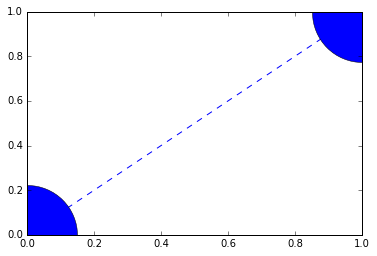

In [4]:
x=[0,1]
y=[0,1]

matplotlib.pyplot.plot(x,y, "o--",markersize=100)

In [5]:
from __future__ import division #skip
import time

import numpy as npy

from sklearn.svm import SVR #sklearn/svn directoryの中のclasses.pyファイルからSVRクラスをimportしている。
#.svmのあとに.classesを付けても良い。
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import pylab as pl #pylabはmatplotlib.pyplotと同じ意味

In [6]:
random_generator=npy.random.RandomState(1) #randomクラスのオブジェクト。乱数生成期の初期化。0というseedで初期化。

In [7]:
for i in xrange(1): #0から99までの列
    print random_generator.rand()

0.417022004703


In [8]:
#Generate sample data
Num_of_data=10000
divisor=5
assert Num_of_data%divisor==0,"Needs that Num_of_data%divisor==0" #assertは中がfalseのときにエラーを出す。

X=5*random_generator.rand(Num_of_data, 1)
print X
y=npy.sin(X).ravel() #ravel()を付けると行列がリストになる、numpyでは行列はリストの中にリストになると言える
print(y)
print(y[::2]) #syntax error 文法エラー #x::yではxからy個に一個値が出力される # x:: （y無し）ではy=1となる、::y（x無し）ではx=0となる
#Add noise to tagets
y[::divisor] += 3 * (0.5 - random_generator.rand(X.shape[0] // divisor)) 
#0.5 here behaves as the matrix with the same number of rows and columns as random_generator.rand(...).
#X.shape=(num_of_rows,num_of_columns). Therefore, X.shape[1]=num_of_rows, 
# for int types a,b,  a//b =a%b as in C language. i.e. devision of two integers, but does not return the remainder.


[[  3.60162247e+00]
 [  5.71874087e-04]
 [  1.51166286e+00]
 ..., 
 [  5.40218282e-01]
 [  3.81396889e+00]
 [  3.82748480e+00]]
[ -4.43974821e-01   5.71874056e-04   9.98252126e-01 ...,   5.14323201e-01
  -6.22846776e-01  -6.33363657e-01]
[-0.44397482  0.99825213  0.44546446 ..., -0.32567712  0.29329201
 -0.62284678]


In [64]:
X_plot = npy.linspace(0, 5, 100000)[:, None]
#linspace(a,b,num) return a list[a,...,b] with num elements.
#[:,None] converts a list to a matrix which is a column vector.


In [13]:
#Generate sample data
Num_of_data=10000
divisor=5

assert Num_of_data%divisor == 0, "the remainder of Num of data divided by divisor must be zero"



X=divisor*random_generator.rand(Num_of_data, 1)
print X
print X.shape[0]
y=npy.sin(X).ravel() #ravel()を付けると行列がリストになる、numpyでは行列はリストの中にリストになると言える
print(y)
print(y[::2]) #syntax error 文法エラー #x::yではxからy個に一個値が出力される # x:: （y無し）ではy=1となる、::y（x無し）ではx=0となる
#Add noise to tagets
y[::divisor] += 3 * (0.5 - random_generator.rand(X.shape[0] // divisor)) 
#0.5 here behaves as the matrix with the same number of rows and columns as random_generator.rand(...).
#X.shape=(num_of_rows,num_of_columns). Therefore, X.shape[1]=num_of_rows, 
# for int types a,b,  a//b =a%b as in C language. i.e. devision of two integers, but does not return the remainder.


[[ 0.09984507]
 [ 3.77431295]
 [ 4.41415994]
 ..., 
 [ 1.86720143]
 [ 4.39405913]
 [ 3.33169344]]
10000
[ 0.09967926 -0.59134065 -0.95585835 ...,  0.95639268 -0.94975947
 -0.18895786]
[ 0.09967926 -0.95585835  0.97768692 ...,  0.99618608  0.97194239
 -0.94975947]


In [73]:
#Fit regression model
train_size = 100
svr = GridSearchCV(SVR(kernel="rbf", gamma=-0.1), cv=5,
                    param_grid={"C": [1e0, 1e1, 1e2, 1e3], 
                                "gamma":npy.logspace(-2, 2, 5)}
                  )




t0=time.time()
svr.fit(X[:train_size], y[:train_size])
svr_fit_time=time.time()-t0
print("SVR complexity and bandwith selected and model fitted in %.3f s"
     % svr_fit_time)

sv_ratio=svr.best_estimator_.support_.shape[0] / train_size
print("Support vector ratio: %.3f" % sv_ratio)

t0=time.time()
y_svr=svr.predict(X_plot)
svr_predict_time=time.time()-t0
print("SVR prediction for %d inputs in %.3f s"
        %(X_plot.shape[0], svr_predict_time))


t0=time.time()
y_svr_best=svr.best_estimator_.predict(X_plot)
svr_best_predict_time=time.time()-t0
print("SVR prediction for %d inputs in %.3f s"
        %(X_plot.shape[0], svr_best_predict_time))

SVR complexity and bandwith selected and model fitted in 1.377 s
Support vector ratio: 0.400
SVR prediction for 100000 inputs in 0.159 s
SVR prediction for 100000 inputs in 0.106 s
